### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

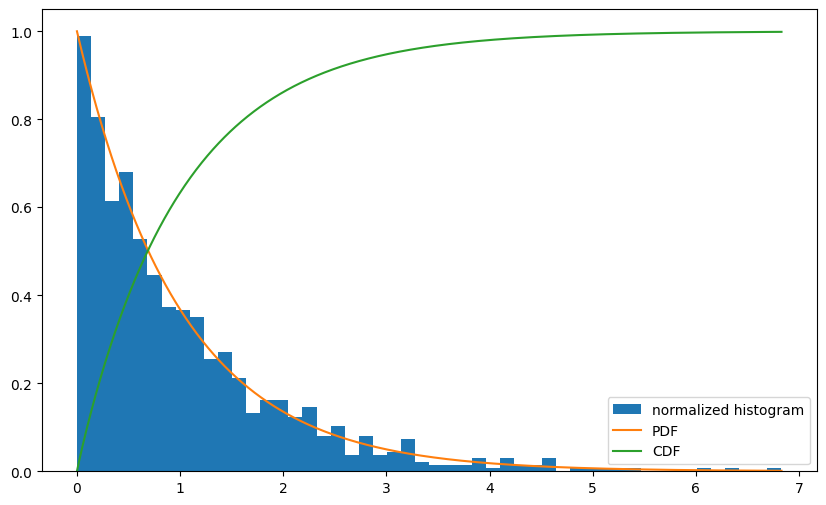

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import scipy.stats as stats

dist = stats.gamma(a=1)
sample = dist.rvs(size=1000)

fitted_params = stats.gamma.fit(sample)
fitted_dist = stats.gamma(*fitted_params)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=50, density=True, label='normalized histogram')
x = np.linspace(0, np.max(sample), 1000)
plt.plot(x, dist.pdf(x), label='PDF')
plt.plot(x, fitted_dist.cdf(x), label='CDF')
plt.legend()
plt.show()


In [3]:
a, loc, scale = stats.gamma.fit(sample)
a, loc, scale


(np.float64(0.9618257799098413),
 np.float64(0.00011652379468310338),
 np.float64(1.0433403506615186))

In [4]:
var_sample = np.var(sample)
print(f"Varianza campione: {var_sample:.3f}")

Varianza campione: 0.993


SOLUZIONE PROF

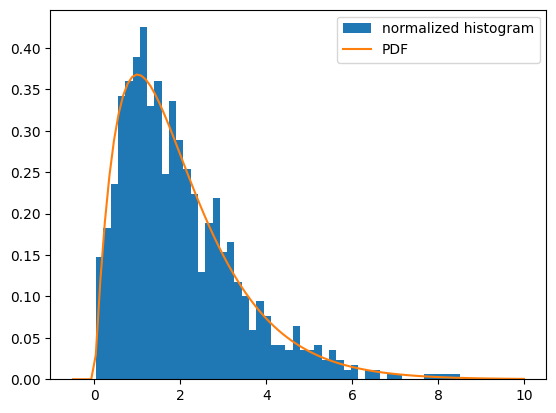

In [5]:
#soluz prof
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math


dist = sp.stats.gamma(a=2, scale=1)
sample = dist.rvs(size=1000)#random variate sample
#print(sample)

plt.hist(sample, bins=50, density= True, label='normalized histogram')
x = np.linspace(-0.5, 10, 100)
plt.plot(x, dist.pdf(x), label='PDF')
plt.legend()
plt.show()


In [6]:
forma, loc, scala = sp.stats.gamma.fit(sample)
print(forma)

2.0883906573461886


In [7]:
#Calcola la funzione di distribuzione comulativa (CDF) per un valore specifico
cdf_value = dist.cdf(2)
print("CDF:", cdf_value)

#Calcola la funzione di distribuzione comulativa inversa (PPF) per una probabilita specifica
ppf_value = dist.ppf(0.5)
print("PPF:", ppf_value)

#Calcola il momento n-esimo della distribuzione
moment_value = dist.moment(2) #Secondo momento
print("Second moment:", moment_value)

#Calcola la media della distribuzione
mean_value = dist.mean()
print("Mean:", mean_value)

#Calcola la varianza della distribuzione
variance_value = dist.var()
print("Variance:", variance_value)

#Calcola la deviazione standard della distribuzione
std_dev_value = dist.std()
print("Standard Deviation:", std_dev_value)

CDF: 0.5939941502901616
PPF: 1.6783469900166612
Second moment: 6.0
Mean: 2.0
Variance: 2.0
Standard Deviation: 1.4142135623730951


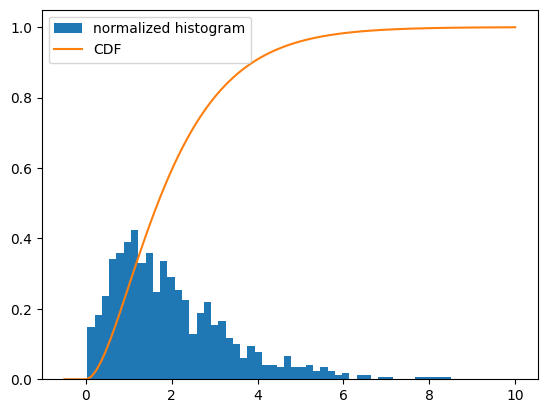

In [8]:
plt.hist(sample, bins=50, density=True, label='normalized histogram')
plt.plot(x, dist.cdf(x), label='CDF')
plt.legend()
plt.show()

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

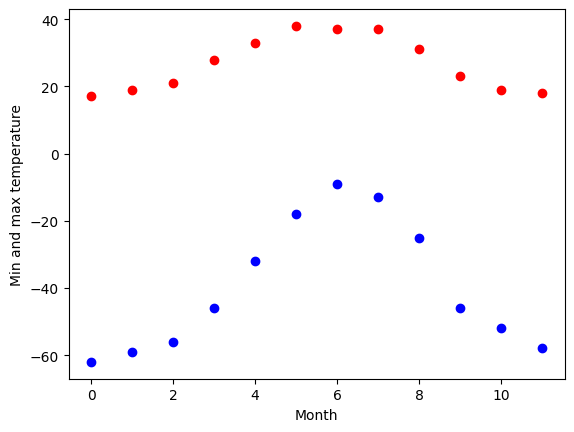

In [9]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


MAE (temp_max): 0.7811771561771629
MAE (temp_min): 2.9569735819736844
RMSE (temp_max): 0.9301038867208512
RMSE (temp_min): 3.487912490377805


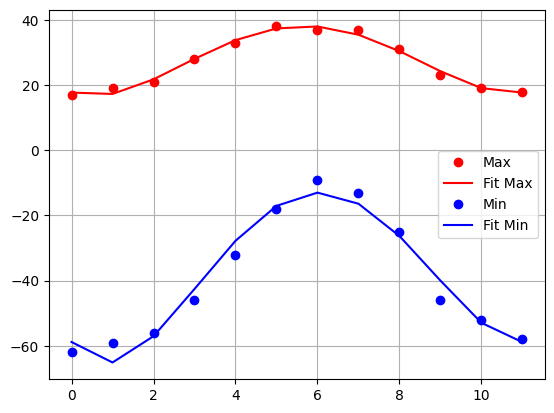

In [18]:
fit_max = np.poly1d(np.polyfit(months, temp_max, 4))
fit_min = np.poly1d(np.polyfit(months, temp_min, 4))

pred_max = fit_max(months)
pred_min = fit_min(months)

mae_max = np.mean(np.abs(temp_max - pred_max))
rmse_max = np.sqrt(np.mean((temp_max - pred_max)**2))

mae_min = np.mean(np.abs(temp_min - pred_min))
rmse_min = np.sqrt(np.mean((temp_min - pred_min)**2))

print("MAE (temp_max):", mae_max)
print("MAE (temp_min):", mae_min)
print("RMSE (temp_max):", rmse_max)
print("RMSE (temp_min):", rmse_min)

plt.plot(months, temp_max, "ro", label="Max")
plt.plot(months, pred_max, "r-", label="Fit Max")
plt.plot(months, temp_min, "bo", label="Min")
plt.plot(months, pred_min, "b-", label="Fit Min")
plt.legend()
plt.grid(True)
plt.show()



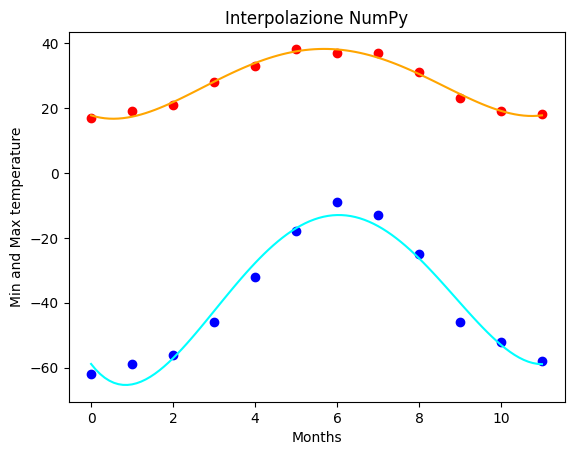

MAE (temp_max) NumPy: 0.7811771561771629
MAE (temp_min) NumPy: 2.9569735819736844
RMSE (temp_max) NumPy: 0.9301038867208512
RMSE (temp_min) NumPy: 3.487912490377805


In [11]:
#soluz prof
x_int = np.linspace(0, 11, 100)
coeffs_1 = np.polyfit(months, temp_max, 4)
y_np_int_1 = np.polyval(coeffs_1, x_int)
coeffs_2 = np.polyfit(months, temp_min, 4)
y_np_int_2 = np.polyval(coeffs_2, x_int)

plt.title("Interpolazione NumPy")
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Months")
plt.ylabel("Min and Max temperature")
plt.plot(x_int, y_np_int_1, color='orange')
plt.plot(x_int, y_np_int_2, color='cyan')
plt.show()

y_np_int_1_interp = np.interp(months, x_int, y_np_int_1)
y_np_int_2_interp = np.interp(months, x_int, y_np_int_2)

mae_np = np.mean(np.abs(temp_max - y_np_int_1_interp))
mae_np2 = np.mean(np.abs(temp_min - y_np_int_2_interp))
print("MAE (temp_max) NumPy:", mae_np)
print("MAE (temp_min) NumPy:", mae_np2)
rmse_np = np.sqrt(np.mean((temp_max - y_np_int_1_interp)**2))
rmse_np2 = np.sqrt(np.mean((temp_min - y_np_int_2_interp)**2))
print("RMSE (temp_max) NumPy:", rmse_np)
print("RMSE (temp_min) NumPy:", rmse_np2)


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Modello: mpg = -0.0412 * disp + 29.5999


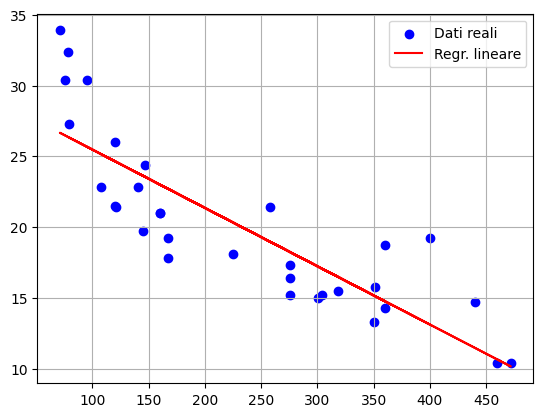

(np.float64(2.605473485761067), np.float64(3.1482072740002796))

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

x = df['disp'].values
y = df['mpg'].values

coeffs = np.polyfit(x, y, deg=1)
m, q = coeffs
print(f"Modello: mpg = {m:.4f} * disp + {q:.4f}")

y_pred = m * x + q

plt.scatter(x, y, color='blue', label='Dati reali')
plt.plot(x, y_pred, color='red', label='Regr. lineare')
plt.legend()
plt.grid(True)
plt.show()

# Calcolo MAE e RMSE
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred)**2))
mae, rmse



SOLUZ PROF

In [13]:
import pandas as pd

# Caricamento dati
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


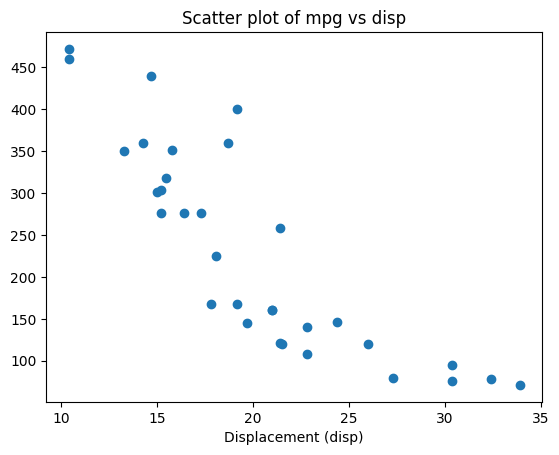

In [14]:
plt.scatter(df['mpg'], df['disp'])
plt.xlabel('Miles per gallon(mpg)')
plt.xlabel('Displacement (disp)')
plt.title('Scatter plot of mpg vs disp')
plt.show()

Slope: -17.429121670356285
Intercept: 580.8838225585017


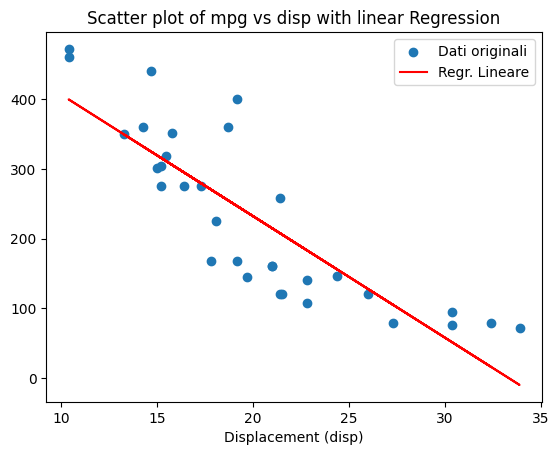

In [15]:

#I dati sembrano avere un andamento lineare, quindi possiamo usare la regressione lineare
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df['mpg'], df['disp'])
print("Slope:", slope)
print("Intercept:", intercept)
#Calcola i valori previsti
predicted_disp = slope * df['mpg'] + intercept
plt.scatter(df['mpg'], df['disp'], label='Dati originali')
plt.plot(df['mpg'], predicted_disp, color='red', label='Regr. Lineare')
plt.xlabel('Miles per gallon(mpg)')
plt.xlabel('Displacement (disp)')
plt.title('Scatter plot of mpg vs disp with linear Regression')
plt.legend()
plt.show()


In [16]:
def calculate_rmse(y_real, y_pred):
    if len(y_real) != len(y_pred) :
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    mse = sum((y_real[i] - y_pred[i]) ** 2 for i in range(len(y_real))) / len(y_real)
    return math.sqrt(mse)

def calculate_mae(y_real, y_pred) :
    if len(y_real) != len(y_pred) :
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    errors = [abs(y_real[i] - y_pred[i]) for i in range(len(y_real))]
    return sum(errors) / len(errors)

# MAE e RMSE per lineare (NumPy)
mae = calculate_mae(df ['disp'], predicted_disp)
rmse = calculate_rmse(df['disp'], predicted_disp)
print("MAE (NUmPy):", mae)
print("RMSE (NUmPy):", rmse)

MAE (NUmPy): 53.20774057606377
RMSE (NUmPy): 64.7400133662678
